<a href="https://colab.research.google.com/github/alexnorwood01/Macro-Economic-Dashboard/blob/Main/RE_dashboard_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Macro Economics GDP / Employment # Interest Rates / Inflation
 # Macro Economics Debt # Savings Ratio
 # Housing Market - Sales Price # Planning Permissions Granted/ Build Complitions
 # Housing Market










# Dublin Population v Nominal Income Y
#Dublin Employment level (unemployment v wages Y
#interest rates v inflation
#goverment bond yields v rental uyields - whats the risk premium
# housing delveries  v population 
#market sales volume and average
#new mortgages v exisitng
# residental price v rent
#Resi completions - comparisons
# Property Price Register
# Opeaating income 
# Cap rate by sectors

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [ ]:
#Employment v income (Dublin v National)

In [ ]:
  df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/QLF07/CSV/1.0/en")

In [ ]:
df.iloc[:,2].unique()

array([20121, 20122, 20123, 20124, 20131, 20132, 20133, 20134, 20141,
       20142, 20143, 20144, 20151, 20152, 20153, 20154, 20161, 20162,
       20163, 20164, 20171, 20172, 20173, 20174, 20181, 20182, 20183,
       20184, 20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204])

In [ ]:
df.dtypes

STATISTIC                      object
Statistic                      object
TLIST(Q1)                       int64
Quarter                        object
C02199V02655                   object
Sex                            object
C02598V03152                   object
NACE Rev 2 Economic Sector     object
C02196V04140                   object
Region                         object
UNIT                           object
VALUE                         float64
dtype: object

In [ ]:
Emp = df.loc[(df['Sex']== 'Both sexes')&(df['NACE Rev 2 Economic Sector']== 'All NACE economic sectors')&(df['Region'].isin (['State']))]

In [ ]:
Emp['index'] = Emp.apply(lambda row: (row.VALUE / 2014.4)*100, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Emp = Emp.set_index('Quarter')

In [ ]:
Emp2 = df.loc[(df['Sex']== 'Both sexes')&(df['NACE Rev 2 Economic Sector']== 'All NACE economic sectors')&(df['Region'].isin (['Dublin']))]

In [ ]:
Emp2['index'] = Emp2.apply(lambda row: (row.VALUE / 600.9)*100, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Emp2 = Emp2.set_index('Quarter')

In [ ]:
empN = Emp['index']
empD = Emp2['index']

In [ ]:
x = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/EHQ03/CSV/1.0/en"
df = pd.read_csv(x)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Income = df.loc[(df['Statistic']== 'Average Weekly Earnings')&(df['Economic Sector NACE Rev 2']== 'All NACE economic sectors')&(df['Type of Employee']== 'All employees')&(df['Quarter']>= '2012Q1')]

In [ ]:
Income['Value2'] = Income['VALUE'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Income['index'] = Income.apply(lambda row: (row.Value2 / 701.11)*100, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Income2 = Income.set_index('Quarter')

In [ ]:
IncN = Income2['index']

In [ ]:
# Completions of New Houses v Planning Permissions

In [ ]:
#Variable interest rate of new housing loans
x = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/CBM02/CSV/1.0/en"
df = pd.read_csv(x)

In [ ]:
I = df

In [ ]:
IR = I.loc[(df['Statistic'] == 'Variable interest rate and up to one year fixation on new housing loans')]

In [ ]:
IR2 = IR.set_index('Month')

In [ ]:
IR3 = IR2['VALUE']

In [ ]:
IR3

Month
2003M01    4.08
2003M02    4.28
2003M03    4.04
2003M04    4.00
2003M05    3.90
           ... 
2020M10    3.17
2020M11    3.13
2020M12    3.11
2021M01    3.14
2021M02    3.12
Name: VALUE, Length: 218, dtype: float64

In [ ]:
#GDP MAcro economics

In [ ]:
x = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NQQ44/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
GDP = df.loc[(df['Statistic']== 'GDP at Current Market Prices (Seasonally Adjusted)')]
GDP.loc[df['Quarter'] == '2015Q1']

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02196V02652,State,UNIT,VALUE
1432,NQQ44S10,GDP at Current Market Prices (Seasonally Adjus...,20151,2015Q1,-,State,Euro Million,63301


In [ ]:
GDP2 = GDP.set_index('Quarter')

In [ ]:
GDP2['index'] = GDP2.apply(lambda row: (row.VALUE / 63301)*100, axis = 1)

In [ ]:
GDP3 = GDP2['index']

In [ ]:
#https://www.centralbank.ie/statistics/data-and-analysis/financial-accounts
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

x = 'https://www.centralbank.ie/docs/default-source/statistics/data-and-analysis/financial-accounts/qfa-landing-page-charts-data/dataset2.xlsx?sfvrsn=17'
df = pd.read_excel(x)


In [ ]:
df.columns = ['Quarter', 'Household_Debt', 'Debt_to_Disposible']

In [ ]:
df2 = df.iloc[2:]

In [ ]:
df2 = df2.set_index('Quarter')
HHdebt = df2['Debt_to_Disposible'] #household debt as a percentage of personal income

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

x = 'https://www.centralbank.ie/docs/default-source/statistics/data-and-analysis/financial-accounts/qfa-landing-page-charts-data/dataset4.xlsx?sfvrsn=17'
df = pd.read_excel(x)


In [ ]:
df.columns = ['Quarter', 'nonfinancial corporates', 'households', 'privatesector', 'eu_thresholds']

In [ ]:
df2 = df.iloc[2:]

In [ ]:
df2 = df2.set_index('Quarter')
PSdebt = df2['privatesector'] #privatesectordebt

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

x = 'https://www.centralbank.ie/docs/default-source/statistics/data-and-analysis/financial-accounts/qfa-landing-page-charts-data/dataset5.xlsx?sfvrsn=17'
df = pd.read_excel(x)


In [ ]:
df.columns = ['Quarter', 'Deposits', 'ST_securities', 'LT_securities', 'Loans','QGD']

In [ ]:
df2 = df.iloc[5:]
df2.loc[df['Quarter'] == '2015 Q1']

,Quarter,Deposits,ST_securities,LT_securities,Loans,QGD
53,2015 Q1,20.4783,6.43821,147.842,60.6571,203.585


In [ ]:
df2['index'] = df2.apply(lambda row: (row.QGD / 203.585)*100, axis = 1)
df3 = df2.set_index('Quarter')
QGD = df3['QGD'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/QLF02/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
Ump = df.loc[(df['Statistic']== 'ILO Unemployment Rates (15 - 74 years) (Seasonally Adjusted)')&(df['Sex']== 'Both sexes')]

In [ ]:
Ump.loc[Ump['Quarter'] == '2015Q1']

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02199V02655,Sex,UNIT,VALUE
1032,QLF02S2,ILO Unemployment Rates (15 - 74 years) (Season...,20151,2015Q1,-,Both sexes,%,10.7


In [ ]:
Ump['index'] = Ump.apply(lambda row: (row.VALUE / 10.7)*100, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Ump2 = Ump.set_index('Quarter')
Ump3 = Ump2['index']

In [ ]:
x = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/CPM03/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
df.iloc[:,5].unique()

array(['Alcohol', 'Tobacco', 'CPI excluding Tobacco',
       'CPI excluding Housing', 'CPI excluding Mortgage Interest',
       'CPI excluding Energy Products', 'Energy Products', 'Goods',
       'CPI excluding Energy and Unprocessed Food',
       'Services excluding Mortgage Interest', 'Mortgage Interest',
       'Services',
       'CPI excluding Mortgage Interest and Local Property Tax',
       'Utilities and Local Charges'], dtype=object)

In [ ]:
Inf = df.loc[(df['Statistic']== 'Consumer Price Index (Base Dec 2016=100)')&(df['Month']>= '2003M01')&(df['Selected Sub Indices']== 'CPI excluding Tobacco')&(df['UNIT']== 'Base Dec 2016=100')]
Inf['index'] = Inf.apply(lambda row: (row.VALUE / 85.3)*100, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Inf1 = Inf.set_index('Month')
Inf2 = Inf1['index']

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

x = 'https://www.centralbank.ie/docs/default-source/statistics/data-and-analysis/financial-accounts/qfa-landing-page-charts-data/dataset3.xlsx?sfvrsn=17'
df = pd.read_excel(x)

In [ ]:
df.columns = ['Quarter', 'Currency & Deposits', 'Financial Assets', 'Liabilities', 'Investment','Statistical Discrepancy', 'Savings']

In [ ]:
df2 = df.iloc[1:]

In [ ]:
saving = df2.set_index('Quarter')
Saving1 = saving['Savings']

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

x = 'https://www.centralbank.ie/docs/default-source/statistics/data-and-analysis/financial-accounts/qfa-landing-page-charts-data/dataset6.xlsx?sfvrsn=17'
df = pd.read_excel(x)

In [ ]:
df.columns = ['Quarter', 'non-financial corp', 'Financial corp', 'goverment', 'household','row', 'domestic']
df2 = df.iloc[3:]

In [ ]:
Net = df2.set_index('Quarter')
Net['Zero'] = Net.apply(lambda row: (row.domestic *0 ), axis = 1)

In [ ]:
Nonfincorp = Net['non-financial corp']
fincorp = Net['Financial corp']
government = Net['goverment']
household = Net['household']
domestic =  Net['domestic']
zero = Net['Zero']

In [ ]:
fincorp

Quarter
2003 Q1    -0.161048
2003 Q2     0.298231
2003 Q3     0.981835
2003 Q4      1.01678
2004 Q1      1.09844
             ...    
2019 Q4      2.68688
2020 Q1   -0.0862208
2020 Q2     0.713476
2020 Q3     -2.49555
2020 Q4     -2.12525
Name: Financial corp, Length: 72, dtype: object

In [ ]:
x = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDQ06/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
df1 = df.set_index('Quarter')
df1

,STATISTIC,Statistic,TLIST(Q1),C01947V02657,Local Authority,C02342V02816,Type of House,UNIT,VALUE
Quarter,,,,,,,,,
2011Q1,NDQ06,New Dwelling Completion,20111,-,All Local Authorities,6,Single house,Number,1156
2011Q1,NDQ06,New Dwelling Completion,20111,-,All Local Authorities,7,Scheme house,Number,447
2011Q1,NDQ06,New Dwelling Completion,20111,-,All Local Authorities,8,Apartment,Number,272
2011Q1,NDQ06,New Dwelling Completion,20111,01,Carlow (County Council),6,Single house,Number,17
2011Q1,NDQ06,New Dwelling Completion,20111,01,Carlow (County Council),7,Scheme house,Number,0
...,...,...,...,...,...,...,...,...,...
2021Q1,NDQ06,New Dwelling Completion,20211,91,Waterford City and County,7,Scheme house,Number,48
2021Q1,NDQ06,New Dwelling Completion,20211,91,Waterford City and County,8,Apartment,Number,1
2021Q1,NDQ06,New Dwelling Completion,20211,92,Tipperary County,6,Single house,Number,36


In [ ]:
LASH = df1.loc[(df1['Local Authority']== 'All Local Authorities')&(df1['Type of House']== 'Single house')]
LAScH = df1.loc[(df1['Local Authority']== 'All Local Authorities')&(df1['Type of House']== 'Scheme house')]
LAA = df1.loc[(df1['Local Authority']== 'All Local Authorities')&(df1['Type of House']== 'Apartment')]

LASH1 = LASH['VALUE']
LAScH1 = LAScH['VALUE']
LAA1 = LAA['VALUE']

In [ ]:
DCSH = df1.loc[(df1['Local Authority']== 'Dublin (City Council)')&(df1['Type of House']== 'Single house')]
DCScH = df1.loc[(df1['Local Authority']== 'Dublin (City Council)')&(df1['Type of House']== 'Scheme house')]
DCA = df1.loc[(df1['Local Authority']== 'Dublin (City Council)')&(df1['Type of House']== 'Apartment')]

In [ ]:
DCSH1 = DCSH['VALUE']
DCScH1 = DCScH['VALUE']
DCA1 = DCA['VALUE']

In [ ]:
x = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPQ01/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
df.columns

Index(['STATISTIC', 'Statistic', 'TLIST(Q1)', 'Quarter', 'C03346V04033',
       'Dwelling Status', 'UNIT', 'VALUE'],
      dtype='object')

In [ ]:
PPI = df.loc[(df['Statistic']== 'Residential Property Price Index')&(df['Dwelling Status']== 'All Dwelling Statuses')]

In [ ]:
PPI1 = PPI.set_index('Quarter')
PPI2 = PPI1['VALUE']

In [ ]:

x = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPM03/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
df

,STATISTIC,Statistic,TLIST(M1),Month,C03346V04033,Dwelling Status,C03341V04028,Stamp Duty Event,C03348V04035,RPPI Region,C03344V04031,Type of Buyer,UNIT,VALUE
0,HPM03C01,Volume of Sales,201001,2010M01,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Number,982.0
1,HPM03C01,Volume of Sales,201001,2010M01,-,All Dwelling Statuses,1,Filings,-,All,02,Household Buyer - First-Time Buyer Owner-Occupier,Number,534.0
2,HPM03C01,Volume of Sales,201001,2010M01,-,All Dwelling Statuses,1,Filings,-,All,03,Household Buyer - Former Owner-Occupier,Number,292.0
3,HPM03C01,Volume of Sales,201001,2010M01,-,All Dwelling Statuses,1,Filings,-,All,04,Household Buyer - Non-Occupier,Number,156.0
4,HPM03C01,Volume of Sales,201001,2010M01,-,All Dwelling Statuses,1,Filings,10,Border Excluding Louth,-,All Buyer Types,Number,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544315,HPM03C04,Median Price,202103,2021M03,02,Existing,2,Executions,82,Cork County,04,Household Buyer - Non-Occupier,Euro,177500.0
544316,HPM03C04,Median Price,202103,2021M03,02,Existing,2,Executions,83,Kerry,-,All Buyer Types,Euro,175000.0
544317,HPM03C04,Median Price,202103,2021M03,02,Existing,2,Executions,83,Kerry,02,Household Buyer - First-Time Buyer Owner-Occupier,Euro,150000.0
544318,HPM03C04,Median Price,202103,2021M03,02,Existing,2,Executions,83,Kerry,03,Household Buyer - Former Owner-Occupier,Euro,204250.0


In [ ]:
VoS = df.loc[(df['Statistic']== 'Volume of Sales')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'All')&(df['Type of Buyer']== 'All Buyer Types')]
VoS1 = VoS.set_index('Month')
VoS2 = VoS1['VALUE']

In [ ]:
MsP = df.loc[(df['Statistic']== 'Median Price')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'All')&(df['Type of Buyer']== 'All Buyer Types')]
MsP1 = MsP.set_index('Month')
MsP2 = MsP1['VALUE']

In [ ]:
MsP1

,STATISTIC,Statistic,TLIST(M1),C03346V04033,Dwelling Status,C03341V04028,Stamp Duty Event,C03348V04035,RPPI Region,C03344V04031,Type of Buyer,UNIT,VALUE
Month,,,,,,,,,,,,,
2010M01,HPM03C04,Median Price,201001,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,235000.0
2010M02,HPM03C04,Median Price,201002,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,240000.0
2010M03,HPM03C04,Median Price,201003,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,239553.0
2010M04,HPM03C04,Median Price,201004,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,238000.0
2010M05,HPM03C04,Median Price,201005,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,224500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020M11,HPM03C04,Median Price,202011,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,270000.0
2020M12,HPM03C04,Median Price,202012,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,280000.0
2021M01,HPM03C04,Median Price,202101,-,All Dwelling Statuses,1,Filings,-,All,-,All Buyer Types,Euro,270000.0


In [ ]:
df.iloc[:,9].unique()

array(['All', 'Border Excluding Louth', 'Cavan', 'Donegal', 'Leitrim',
       'Monaghan', 'Sligo', 'Midland', 'Laois', 'Longford', 'Offaly',
       'Westmeath', 'West', 'Galway City', 'Galway County', 'Mayo',
       'Roscommon', 'Dublin', 'Dublin City', 'Dún Laoghaire-Rathdown',
       'Fingal', 'South Dublin', 'Mid-East including Louth', 'Kildare',
       'Louth', 'Meath', 'Wicklow', 'Mid-West including South Tipperary',
       'Limerick City', 'Limerick County', 'Clare', 'Tipperary',
       'South-East excluding South Tipperary', 'Carlow', 'Kilkenny',
       'Waterford City', 'Waterford County', 'Wexford', 'South-West',
       'Cork City', 'Cork County', 'Kerry'], dtype=object)

In [ ]:
DCVoS = df.loc[(df['Statistic']== 'Volume of Sales')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'Dublin City')&(df['Type of Buyer']== 'All Buyer Types')]
DCVoS1 = DCVoS.set_index('Month')
DCVoS2 = DCVoS1['VALUE']
DCMsP = df.loc[(df['Statistic']== 'Median Price')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'Dublin City')&(df['Type of Buyer']== 'All Buyer Types')]
DCMsP1 = DCMsP.set_index('Month')
DCMsP2 = DCMsP1['VALUE']

CCVoS = df.loc[(df['Statistic']== 'Volume of Sales')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'Cork City')&(df['Type of Buyer']== 'All Buyer Types')]
CCVoS1 = CCVoS.set_index('Month')
CCVoS2 = CCVoS1['VALUE']
CCMsP = df.loc[(df['Statistic']== 'Median Price')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'Cork City')&(df['Type of Buyer']== 'All Buyer Types')]
CCMsP1 = CCMsP.set_index('Month')
CCMsP2 = CCMsP1['VALUE']

GCVoS = df.loc[(df['Statistic']== 'Volume of Sales')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'Galway City')&(df['Type of Buyer']== 'All Buyer Types')]
GCVoS1 = GCVoS.set_index('Month')
GCVoS2 = GCVoS1['VALUE']
GCMsP = df.loc[(df['Statistic']== 'Median Price')&(df['Dwelling Status']== 'All Dwelling Statuses')&(df['Stamp Duty Event']== 'Filings')&(df['RPPI Region']== 'Galway City')&(df['Type of Buyer']== 'All Buyer Types')]
GCMsP1 = GCMsP.set_index('Month')
GCMsP2 = GCMsP1['VALUE']

In [ ]:
pip install eurostat

     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-cp37-none-any.whl size=15146 sha256=afde9bfb9294f1cd83084f2049956648f06318e8d25304d6d03b1dfeb2b32142
  Stored in directory: /root/.cache/pip/wheels/5c/00/9a/82822db383c2d96dcebf839786665a185f92d37e5026f9806f
Successfully built jsonpath-rw


In [ ]:
import eurostat
toc_df = eurostat.get_toc_df()
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,Database by themes,data,folder,,,,
1,General and regional statistics,general,folder,,,,
2,European and national indicators for short-ter...,euroind,folder,,,,
3,Business and consumer surveys (source: DG ECFIN),ei_bcs,folder,,,,
4,Consumer surveys (source: DG ECFIN),ei_bcs_cs,folder,,,,
...,...,...,...,...,...,...,...
10437,Enterprises that provided training to develop/...,isoc_ske_ittn2,dataset,11.03.2021,08.02.2021,2012,2020
10438,Participation in education and training - cont...,sks_devcvt,folder,,,,
10439,Enterprises providing training by type of trai...,trng_cvt_01s,dataset,26.02.2019,08.02.2021,2005,2015
10440,Participants in CVT courses by sex and size cl...,trng_cvt_12s,dataset,26.02.2019,08.02.2021,2005,2015


In [ ]:
toc_df.loc[toc_df['title'] == 'Construction cost (or producer prices), new residential buildings - quarterly data']

,title,code,type,last update of data,last table structure change,data start,data end
5029,"Construction cost (or producer prices), new re...",sts_copi_q,dataset,27.05.2021,12.04.2021,1980Q1,2021Q1


In [ ]:
data = eurostat.get_data_df('sts_copi_q', flags=False)
data1 =data.loc[(data['indic_bt']=='CSTI')&(data['geo\\time'].isin (['IE','DE','FR']))&(data['unit']=='I15')]

In [ ]:
data1

,indic_bt,nace_r2,s_adj,unit,geo\time,2021Q1,2020Q4,2020Q3,2020Q2,2020Q1,2019Q4,2019Q3,2019Q2,2019Q1,2018Q4,2018Q3,2018Q2,2018Q1,2017Q4,2017Q3,2017Q2,2017Q1,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3,2014Q2,2014Q1,2013Q4,2013Q3,2013Q2,2013Q1,2012Q4,2012Q3,...,1989Q4,1989Q3,1989Q2,1989Q1,1988Q4,1988Q3,1988Q2,1988Q1,1987Q4,1987Q3,1987Q2,1987Q1,1986Q4,1986Q3,1986Q2,1986Q1,1985Q4,1985Q3,1985Q2,1985Q1,1984Q4,1984Q3,1984Q2,1984Q1,1983Q4,1983Q3,1983Q2,1983Q1,1982Q4,1982Q3,1982Q2,1982Q1,1981Q4,1981Q3,1981Q2,1981Q1,1980Q4,1980Q3,1980Q2,1980Q1
40,CSTI,F_CC11_X_CC113,NSA,I15,DE,NaN,113.3,112.1,112.7,111.0,110.6,110.2,110.6,109.2,108.5,108.4,107.6,106.8,106.0,104.9,103.9,103.2,102.2,101.7,101.0,100.2,99.8,100.0,100.0,100.1,98.9,98.8,98.4,98.7,98.1,97.5,97.6,97.8,97.3,97.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,CSTI,F_CC11_X_CC113,NSA,I15,FR,NaN,110.8,108.9,108.2,109.2,109.1,107.7,107.7,106.6,105.1,106.9,104.8,103.1,102.9,103.0,102.7,101.8,101.5,101.4,100.1,99.6,100.5,99.2,99.6,100.7,100.3,100.4,100.0,101.7,99.6,99.5,101.0,101.6,101.1,101.7,...,57.2,57.3,57.0,57.3,56.7,56.7,56.3,56.0,54.9,55.2,54.9,54.5,54.4,53.1,53.0,52.8,52.3,51.9,51.5,51.0,50.7,50.6,50.0,49.0,48.2,47.9,46.9,46.0,44.9,45.2,44.2,43.0,41.5,40.2,39.2,38.9,37.6,37.3,36.2,35.1
52,CSTI,F_CC11_X_CC113,NSA,I15,IE,NaN,109.3,109.5,109.5,109.3,109.2,107.9,107.9,107.6,107.0,107.2,106.8,102.1,102.0,102.0,101.7,101.1,100.8,100.5,100.3,99.9,100.1,100.2,100.1,99.6,100.0,99.9,99.4,98.8,99.1,99.0,98.8,98.7,98.4,98.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2 = data1.transpose()

In [ ]:
x = ['DE','FR','IE']
data2.columns = (x)

In [ ]:
data3 =data2.iloc[6:]

In [ ]:
data3.reset_index(inplace=True)
data3 = data3.rename(columns = {'index':'date2'})

In [ ]:
data4 = data3.sort_values(by="date2")
data4 = data4.set_index('date2')

In [ ]:
data5 = data4.iloc[80:]
data5

,DE,FR,IE
date2,,,
2000Q1,75.7,66.8,60.3
2000Q2,76.6,67.2,63.7
2000Q3,76.5,67.4,66.4
2000Q4,76.7,69.5,69.2
2001Q1,76.5,69.4,73.9
...,...,...,...
2019Q4,110.6,109.1,109.2
2020Q1,111,109.2,109.3
2020Q2,112.7,108.2,109.5


In [ ]:
IE = data5['IE']
FR = data5['FR']
DE = data5['DE']

In [ ]:
x ='https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BHQ05/CSV/1.0/en'
df = pd.read_csv(x)

In [ ]:
df

,STATISTIC,Statistic,TLIST(Q1),Quarter,C01912V02351,Type of Dwelling,UNIT,VALUE
0,BHQ05C1,Planning Permissions Granted,19751,1975Q1,11,Houses,Number,NaN
1,BHQ05C1,Planning Permissions Granted,19751,1975Q1,102,Private flats/apartments,Number,NaN
2,BHQ05C1,Planning Permissions Granted,19752,1975Q2,11,Houses,Number,NaN
3,BHQ05C1,Planning Permissions Granted,19752,1975Q2,102,Private flats/apartments,Number,NaN
4,BHQ05C1,Planning Permissions Granted,19753,1975Q3,11,Houses,Number,NaN
...,...,...,...,...,...,...,...,...
1467,BHQ05C4,Average Floor Area per Unit,20202,2020Q2,102,Private flats/apartments,Sq Metres,71.0
1468,BHQ05C4,Average Floor Area per Unit,20203,2020Q3,11,Houses,Sq Metres,155.0
1469,BHQ05C4,Average Floor Area per Unit,20203,2020Q3,102,Private flats/apartments,Sq Metres,74.0
1470,BHQ05C4,Average Floor Area per Unit,20204,2020Q4,11,Houses,Sq Metres,157.0


In [ ]:
data1 =df.loc[(df['Statistic']=='Units for which Permission Granted')&(df['Type of Dwelling']=='Houses')]
data2 =df.loc[(df['Statistic']=='Units for which Permission Granted')&(df['Type of Dwelling']=='Private flats/apartments')]

In [ ]:
h1 = data1.set_index('Quarter')
a1 = data2.set_index('Quarter')
h2 = h1['VALUE']
a2 = a1['VALUE']

In [ ]:
a2

Quarter
1975Q1     265.0
1975Q2     404.0
1975Q3     299.0
1975Q4     354.0
1976Q1     417.0
           ...  
2019Q4    7195.0
2020Q1    9041.0
2020Q2    4208.0
2020Q3    7871.0
2020Q4    5104.0
Name: VALUE, Length: 184, dtype: float64

In [ ]:
toc_df.loc[toc_df['title'] == 'HICP (2015 = 100) - annual data (average index and rate of change)']

,title,code,type,last update of data,last table structure change,data start,data end
1373,HICP (2015 = 100) - annual data (average index...,prc_hicp_aind,dataset,19.05.2021,08.02.2021,1996,2020
4898,HICP (2015 = 100) - annual data (average index...,prc_hicp_aind,dataset,19.05.2021,08.02.2021,1996,2020
4945,HICP (2015 = 100) - annual data (average index...,prc_hicp_aind,dataset,19.05.2021,08.02.2021,1996,2020


In [ ]:
data = eurostat.get_data_df('prc_hicp_aind', flags=False)
data1 =data.loc[(data['unit']=='INX_A_AVG')&(data['geo\\time'].isin (['IE','DE','FR']))&(data['coicop']=='CP041')]

In [ ]:
data1
data2 = data1.transpose()

In [ ]:
x = ['DE','FR','IE']
data2.columns = (x)

In [ ]:
data3 =data2.iloc[3:]
data3.reset_index(inplace=True)
data3 = data3.rename(columns = {'index':'date'})

In [ ]:
data4 = data3.sort_values(by="date")
data4 = data4.set_index('date')

In [ ]:
RentDE = data4['DE']
RentFR = data4['FR']
RentIE = data4['IE']

In [ ]:
RentDE

date
1996     79.4
1997     81.5
1998     82.5
1999     83.3
2000     84.2
2001     85.1
2002     86.3
2003     87.2
2004       88
2005     88.8
2006     89.8
2007     90.7
2008     91.7
2009     92.7
2010     93.8
2011     94.9
2012     96.1
2013     97.3
2014     98.8
2015      100
2016    101.2
2017    102.9
2018    104.6
2019    106.1
2020    107.6
Name: DE, dtype: object

In [ ]:
data = eurostat.get_data_df('prc_hicp_manr', flags=False)
data1 =data.loc[(data['unit']=='RCH_A')&(data['geo\\time'].isin (['IE']))&(data['coicop']=='CP00')]

In [ ]:
data1


,unit,coicop,geo\time,2021M04,2021M03,2021M02,2021M01,2020M12,2020M11,2020M10,2020M09,2020M08,2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01,2018M12,2018M11,2018M10,2018M09,2018M08,2018M07,2018M06,2018M05,2018M04,...,2000M04,2000M03,2000M02,2000M01,1999M12,1999M11,1999M10,1999M09,1999M08,1999M07,1999M06,1999M05,1999M04,1999M03,1999M02,1999M01,1998M12,1998M11,1998M10,1998M09,1998M08,1998M07,1998M06,1998M05,1998M04,1998M03,1998M02,1998M01,1997M12,1997M11,1997M10,1997M09,1997M08,1997M07,1997M06,1997M05,1997M04,1997M03,1997M02,1997M01
212,RCH_A,CP00,IE,1.1,0.1,-0.4,-0.1,-1.0,-1.0,-1.5,-1.2,-1.1,-0.6,-0.6,-0.8,-0.3,0.5,0.9,1.1,1.1,0.8,0.6,0.6,0.6,0.5,1.1,1.0,1.7,1.1,0.7,0.8,0.8,0.8,1.1,1.2,0.9,1.0,0.7,0.7,-0.1,...,5.1,5.0,4.6,4.5,3.9,2.9,2.8,2.6,2.5,2.0,2.1,2.4,2.0,2.0,2.3,2.0,2.1,2.3,2.6,2.7,2.9,2.4,2.6,2.3,2.0,1.6,1.0,1.3,1.0,1.0,0.9,0.6,0.7,1.6,1.4,1.5,1.6,1.3,1.7,1.8


In [ ]:
data1
data2 = data1.transpose()

In [ ]:
x = ['IE']
data2.columns = (x)

In [ ]:
data3 =data2.iloc[3:]
data3.reset_index(inplace=True)
data3 = data3.rename(columns = {'index':'date'})

In [ ]:
data4 = data3.sort_values(by="date")
data4 = data4.set_index('date')

In [ ]:
data5 = data4.iloc[72:]

In [ ]:
data5

,IE
date,
2003M01,4.8
2003M02,5.1
2003M03,4.9
2003M04,4.5
2003M05,3.9
...,...
2020M12,-1
2021M01,-0.1
2021M02,-0.4


all data from CSO / Central Bank of Ireland / Eurostat


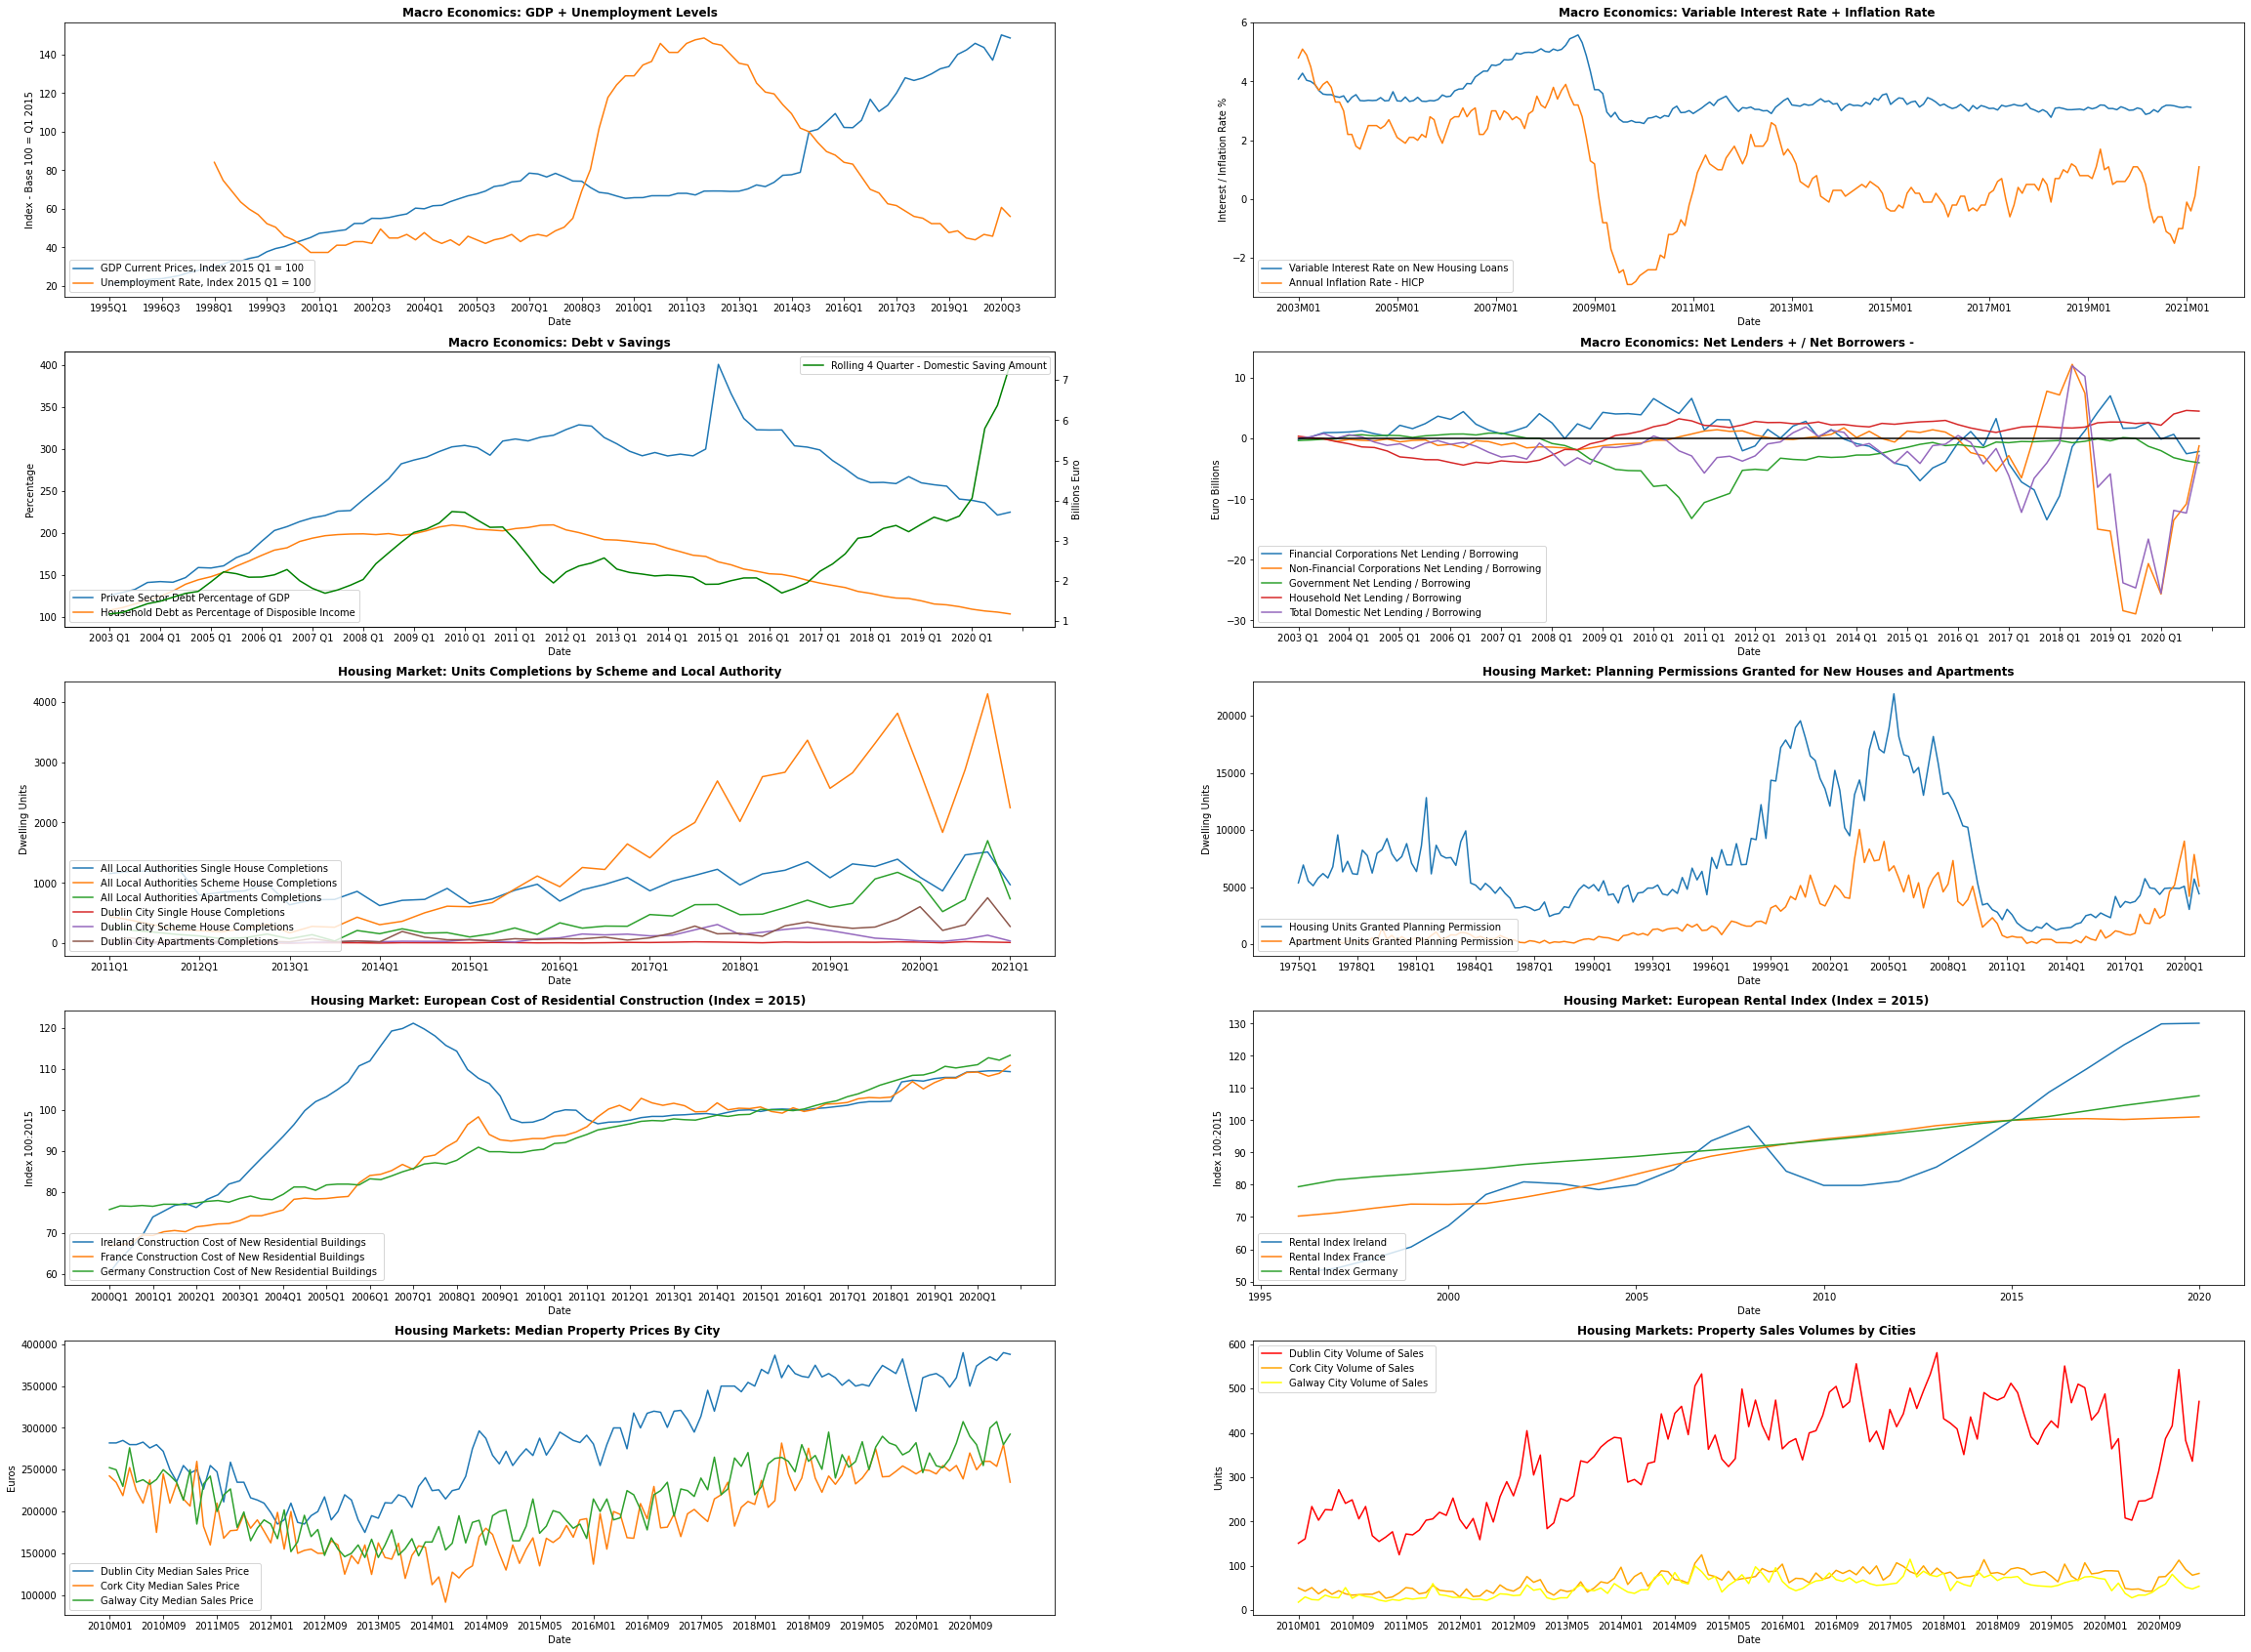

In [ ]:
from pylab import rcParams

from IPython.display import Image
Image("img/picture.png")


plt.subplot(5,2,1)
plt.plot(GDP3, label="GDP Current Prices, Index 2015 Q1 = 100")
plt.plot(Ump3, label="Unemployment Rate, Index 2015 Q1 = 100")
plt.legend(loc='lower left')
plt.title("Macro Economics: GDP + Unemployment Levels", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Index - Base 100 = Q1 2015")
plt.xticks(np.arange(0, len(GDP3)+1, 6))
rcParams['figure.figsize'] = 40, 30

plt.subplot(5,2,2)
plt.plot(IR3, label="Variable Interest Rate on New Housing Loans")
plt.plot(data5,label="Annual Inflation Rate - HICP")
#plt.plot(Inf2, label="CPI inflation Base 2015=100" )
#plt.plot(Saleprice3, label="Rolling Median Sales Price (LH)")
plt.legend(loc='lower left')
plt.title("Macro Economics: Variable Interest Rate + Inflation Rate ", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.xticks(np.arange(0, len(IR3)+1, 24))
plt.ylabel("Interest / Inflation Rate %")
rcParams['figure.figsize'] = 40, 30
#ax2 = plt.twinx()
#ax2.plot(Inf2, label="CPI inflation Base Jan 2015=100", color='green' )
#ax2.legend(loc='lower right')
#ax2.set_ylabel("Inflation Index 2015 m1")
#ax2.set_xticks(np.arange(0, len(IR3)+1, 24))

plt.subplot(5,2,3)
plt.plot(PSdebt, label="Private Sector Debt Percentage of GDP")
plt.plot(HHdebt, label="Household Debt as Percentage of Disposible Income")
#plt.plot(QGD, label="Quarterly Goverment Debt, Base 2015Q1 = 100")
plt.legend(loc='lower left')
plt.title("Macro Economics: Debt v Savings", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Percentage %")
plt.xticks(np.arange(0, len(PSdebt)+1, 4))
rcParams['figure.figsize'] = 40, 30
ax2 = plt.twinx()
ax2.plot(Saving1, label="Rolling 4 Quarter - Domestic Saving Amount", color='green' )
ax2.legend(loc='upper right')
ax2.set_ylabel("Billions Euro")
ax2.set_xticks(np.arange(0, len(Saving1)+1, 4))

plt.subplot(5,2,4)
plt.plot(fincorp, label="Financial Corporations Net Lending / Borrowing")
plt.plot(Nonfincorp, label="Non-Financial Corporations Net Lending / Borrowing")
plt.plot(government, label="Government Net Lending / Borrowing")
plt.plot(household, label="Household Net Lending / Borrowing")
plt.plot(domestic, label="Total Domestic Net Lending / Borrowing")
plt.plot(zero, color = 'black')
plt.legend(loc='lower left')
plt.title("Macro Economics: Net Lenders + / Net Borrowers - ", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Euro Billions")
plt.xticks(np.arange(0, len(fincorp)+1, 4))
rcParams['figure.figsize'] = 40, 30

#plt.subplot(4,2,2)
#plt.plot(empN, label="emp National")
#plt.plot(empD, label="emp Dublin")
#plt.plot(IncN, label="National Average Income")
#plt.legend(loc='lower left')
#plt.title("Employment v Income", fontsize=12, fontweight='bold')
#plt.xlabel("Date")
#plt.ylabel("Index 100 = 2015")
#plt.xticks(np.arange(0, len(empN)+1, 4))
#rcParams['figure.figsize'] = 40, 20


plt.subplot(5,2,5)
plt.plot(LASH1, label="All Local Authorities Single House Completions")
plt.plot(LAScH1, label="All Local Authorities Scheme House Completions")
plt.plot(LAA1, label="All Local Authorities Apartments Completions")
plt.plot(DCSH1, label="Dublin City Single House Completions")
plt.plot(DCScH1, label="Dublin City Scheme House Completions")
plt.plot(DCA1, label="Dublin City Apartments Completions")
plt.legend(loc='lower left')
plt.title("Housing Market: Units Completions by Scheme and Local Authority", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Dwelling Units")
plt.xticks(np.arange(0, len(LASH1)+1, 4))
rcParams['figure.figsize'] = 40, 30
#ax2 = plt.twinx()
#ax2.plot(percof, label=" Completions Percentage of Planning Permissions",color='red')
#ax2.set_ylabel('Perc Completions of Permissions')

plt.subplot(5,2,6)
plt.plot(h2, label="Housing Units Granted Planning Permission")
plt.plot(a2, label="Apartment Units Granted Planning Permission")
plt.legend(loc='lower left')
plt.title("Housing Market: Planning Permissions Granted for New Houses and Apartments", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Dwelling Units")
plt.xticks(np.arange(0, len(a2)+1, 12))
rcParams['figure.figsize'] = 40, 30

plt.subplot(5,2,7)
plt.plot(IE, label="Ireland Construction Cost of New Residential Buildings ")
plt.plot(FR, label="France Construction Cost of New Residential Buildings ")
plt.plot(DE, label="Germany Construction Cost of New Residential Buildings ")
plt.legend(loc='lower left')
plt.title("Housing Market: European Cost of Residential Construction (Index = 2015) ", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Index 100:2015")
plt.xticks(np.arange(0, len(IE)+1, 4))
rcParams['figure.figsize'] = 40, 30

plt.subplot(5,2,8)
plt.plot(RentIE, label="Rental Index Ireland ")
plt.plot(RentFR, label="Rental Index France ")
plt.plot(RentDE, label="Rental Index Germany ")
plt.legend(loc='lower left')
plt.title("Housing Market: European Rental Index (Index = 2015) ", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Index 100:2015")
#plt.xticks(np.arange(0, len(RentIE)+1, 1))
rcParams['figure.figsize'] = 40, 30


plt.subplot(5,2,9)
plt.plot(DCMsP2, label="Dublin City Median Sales Price ")
plt.plot(CCMsP2, label="Cork City Median Sales Price ")
plt.plot(GCMsP2, label="Galway City Median Sales Price ")
plt.legend(loc='lower left')
plt.title("Housing Markets: Median Property Prices By City ", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Euros")
plt.xticks(np.arange(0, len(MsP2)+1, 8))
rcParams['figure.figsize'] = 40, 30

plt.subplot(5,2,10)
plt.plot(DCVoS2, label="Dublin City Volume of Sales ", color='red' )
plt.plot(CCVoS2, label="Cork City Volume of Sales ", color='orange' )
plt.plot(GCVoS2, label="Galway City Volume of Sales ", color='yellow' )
plt.legend(loc='upper left')
plt.title("Housing Markets: Property Sales Volumes by Cities ", fontsize=12, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Units")
plt.xticks(np.arange(0, len(DCVoS2)+1, 8))
rcParams['figure.figsize'] = 40, 30


print('all data from CSO / Central Bank of Ireland / Eurostat')

# New Section